#  NetworkX example

Import the networkx library

In [1]:
import networkx as nx

Initialize the graph. Graph() is for undirected and DiGraph() is for directed graph

In [2]:
G = nx.Graph()
#G = nx.DiGraph()

Add nodes from a list / array

In [3]:
nodes = ["A","B","C"]
G.add_nodes_from(nodes)

Add an edge from A to B

In [4]:
G.add_edge("A","B")

Draw the graph

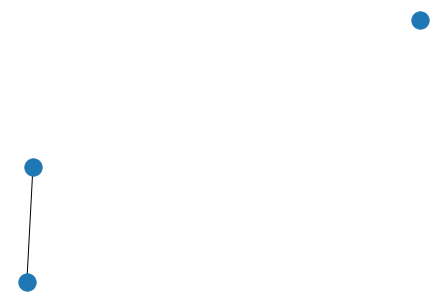

In [5]:
import matplotlib.pyplot as plt

plt.show()
nx.draw(G)

Draw with node label

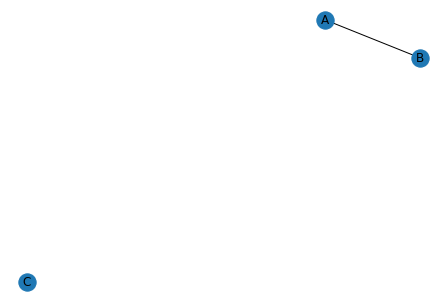

In [6]:
nx.draw(G, with_labels=True)

# Airlines Network

Import libraries and dataset

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing and data structure

Load the dataset

In [8]:
data = pd.read_csv('C:/Users/User10/Desktop/Degree/degree sem 6/data represent/lab/lab3/airlines_network_optimization.csv')

Data Overview

In [9]:
data.shape

(99, 16)

Display the first 5 records in the dataset

In [10]:
data.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance
0,2013,2,26,1807,1630,97,1956,1837,79,EV,4411,N13566,EWR,MEM,144,946
1,2013,8,17,1459,1445,14,1801,1747,14,B6,1171,N661JB,LGA,FLL,147,1076
2,2013,2,13,1812,1815,-3,2055,2125,-30,AS,7,N403AS,EWR,SEA,315,2402
3,2013,4,11,2122,2115,7,2339,2353,-14,B6,97,N656JB,JFK,DEN,221,1626
4,2013,8,5,1832,1835,-3,2145,2155,-10,AA,269,N3EYAA,JFK,SEA,358,2422


# Drawing network graph of flight distance

Create a new dataframe by selecting only origin, dest and distance columns

In [11]:
data_distance = data.filter(['origin', 'dest', 'distance'])

Display the new dataframe

In [12]:
data_distance

,origin,dest,distance
0,EWR,MEM,946
1,LGA,FLL,1076
2,EWR,SEA,2402
3,JFK,DEN,1626
4,JFK,SEA,2422
...,...,...,...
94,LGA,TPA,1010
95,EWR,LAX,2454
96,JFK,BOS,187
97,EWR,SJU,1608


There are several records where origin and dest are the same. Group them together and calculate the mean distance for that group if any.

In [13]:
data_distance = data_distance.groupby(['origin', 'dest'], as_index=False).mean()
data_distance

,origin,dest,distance
0,EWR,BOS,200
1,EWR,CVG,569
2,EWR,DFW,1372
3,EWR,IAD,212
4,EWR,IAH,1400
5,EWR,IND,645
6,EWR,LAX,2454
7,EWR,MCO,937
8,EWR,MEM,946
9,EWR,MIA,1085


Draw network graph based on the data above. Identify which airport (EWR, JFK or LGA) has the most number of long distance flight.

In [14]:
import networkx as nx

graphD = nx.DiGraph()

Add nodes using origin and dest column

In [15]:
graphD.add_nodes_from(data_distance['origin'])
graphD.add_nodes_from(data_distance['dest'])

Add edges with distance as the weight

In [16]:
for index, row in data_distance.iterrows():
    graphD.add_edge(row['origin'], row['dest'], weight=row['distance'])

Draw the graph

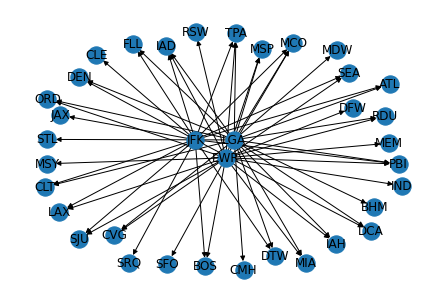

In [17]:
import matplotlib.pyplot as plt
plt.show()

nx.draw(graphD, with_labels=True)

Lets draw the label for the edges

{('EWR', 'BOS'): Text(0.41900191206887316, 0.029808497578193954, '200'),
 ('EWR', 'CVG'): Text(-0.3490979672171856, 0.3461703004059752, '569'),
 ('EWR', 'DFW'): Text(-0.5170086680500043, -0.21781249449968365, '1372'),
 ('EWR', 'IAD'): Text(-0.18506333569719147, -0.4365541524212135, '212'),
 ('EWR', 'IAH'): Text(-0.3787641218771691, 0.4233861499941661, '1400'),
 ('EWR', 'IND'): Text(0.3980331192454989, 0.12755289577798937, '645'),
 ('EWR', 'LAX'): Text(-0.3469603910500003, -0.34580855273764316, '2454'),
 ('EWR', 'MCO'): Text(0.4072948421457993, -0.14084127090398302, '937'),
 ('EWR', 'MEM'): Text(-0.2895443747938744, -0.42404923763395225, '946'),
 ('EWR', 'MIA'): Text(-0.5376232677894895, -0.05111292870382761, '1085'),
 ('EWR', 'MSP'): Text(-0.0785306337015563, 0.502652985904784, '1008'),
 ('EWR', 'MSY'): Text(0.3360641318526452, 0.308212675218501, '1167'),
 ('EWR', 'ORD'): Text(0.327862267144384, -0.3511524128430379, '719'),
 ('EWR', 'PBI'): Text(0.2306484061532904, -0.3213788400470125,

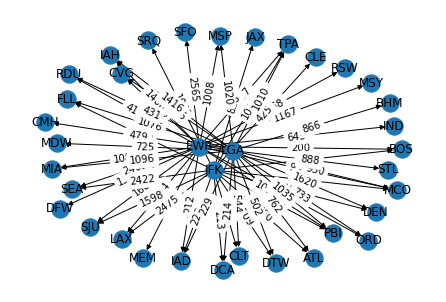

In [18]:
pos = nx.spring_layout(graphD)
edge_labels=dict([((u,v,),d['weight']) for u,v,d in graphD.edges(data=True)])

nx.draw(graphD, pos, with_labels=True)
nx.draw_networkx_edge_labels(graphD,pos,edge_labels=edge_labels)

In [19]:
weight = [graphD.edges[e]['weight'] for e in graphD.edges]

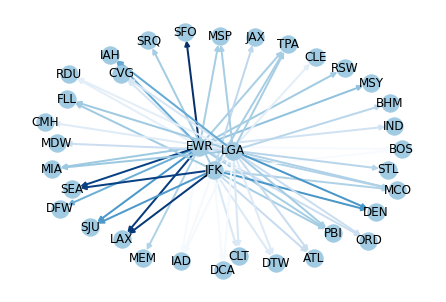

In [20]:
nx.draw(graphD, pos, node_color='#A0CBE2', edge_color=weight, width=2, edge_cmap=plt.cm.Blues, with_labels=True)

# Question 1: Which airport (EWR, JFK or LGA) has the most number of long distance flight

# Drawing network graph of flight delays

Create a new dataframe by selecting origin, dest and dep_delay columns

In [21]:
data_delayed = data.filter(['origin', 'dest', 'dep_delay'])

In [22]:
data_delayed

,origin,dest,dep_delay
0,EWR,MEM,97
1,LGA,FLL,14
2,EWR,SEA,-3
3,JFK,DEN,7
4,JFK,SEA,-3
...,...,...,...
94,LGA,TPA,-6
95,EWR,LAX,0
96,JFK,BOS,-1
97,EWR,SJU,1


Normalize the data to remove negative values. Negative means the flight depart before schedule. Let's just take only rows with dep_delay > 0

In [23]:
data_delayed =data_delayed[data_delayed['dep_delay'] > 0]

In [24]:
data_delayed

,origin,dest,dep_delay
0,EWR,MEM,97
1,LGA,FLL,14
3,JFK,DEN,7
16,JFK,TPA,16
24,EWR,TPA,19
25,EWR,MSY,2
27,JFK,DTW,199
35,LGA,MSP,2
36,LGA,DTW,2
43,EWR,IAH,4


Some record has no value in dep_delay column. Drop those record(s).

In [25]:
data_delayed = data_delayed.dropna()

In [26]:
data_delayed

,origin,dest,dep_delay
0,EWR,MEM,97
1,LGA,FLL,14
3,JFK,DEN,7
16,JFK,TPA,16
24,EWR,TPA,19
25,EWR,MSY,2
27,JFK,DTW,199
35,LGA,MSP,2
36,LGA,DTW,2
43,EWR,IAH,4


Draw network graph

In [27]:
import networkx as nx

graph = nx.DiGraph()

In [28]:
graph.add_nodes_from(data_delayed['origin'])

In [29]:
for index, row in data_delayed.iterrows():
    graph.add_edge(row['origin'], row['dest'], weight=row['dep_delay'])
    

In [30]:
weight = [graph.edges[e]['weight'] for e in graph.edges]

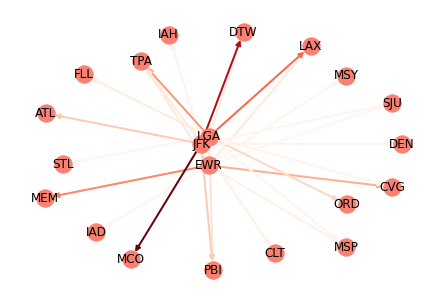

In [31]:
nx.draw(graph, nx.spring_layout(graph), node_color='#FA8072', edge_color=weight, width=2, edge_cmap=plt.cm.Reds, with_labels=True)

# Question 2: Which airport (EWR, JFK or LGA) has the most number of departure delayed flight?

# Question 3: Draw a network graph using air_time as the edges weight. Compare it with the distance graph in Question 1 to know whether there is a direct correlation between air time and distance. Is the graph similar or there are some differences? You can use the same code as in Question 1. You just need to change the column name

In [33]:
data_distance = data.filter(['origin', 'dest', 'air_time'])

In [34]:
data_distance

,origin,dest,air_time
0,EWR,MEM,144
1,LGA,FLL,147
2,EWR,SEA,315
3,JFK,DEN,221
4,JFK,SEA,358
...,...,...,...
94,LGA,TPA,147
95,EWR,LAX,308
96,JFK,BOS,40
97,EWR,SJU,200


In [35]:
data_distance = data_distance.groupby(['origin', 'dest'], as_index=False).mean()
data_distance

,origin,dest,air_time
0,EWR,BOS,39.000000
1,EWR,CVG,110.500000
2,EWR,DFW,210.500000
3,EWR,IAD,41.000000
4,EWR,IAH,210.750000
5,EWR,IND,104.000000
6,EWR,LAX,313.500000
7,EWR,MCO,136.000000
8,EWR,MEM,144.000000
9,EWR,MIA,179.500000


In [36]:
graphD = nx.DiGraph()

In [37]:
graphD.add_nodes_from(data_distance['origin'])
graphD.add_nodes_from(data_distance['dest'])

In [39]:
for index, row in data_distance.iterrows():
    graphD.add_edge(row['origin'], row['dest'], weight=row['air_time'])

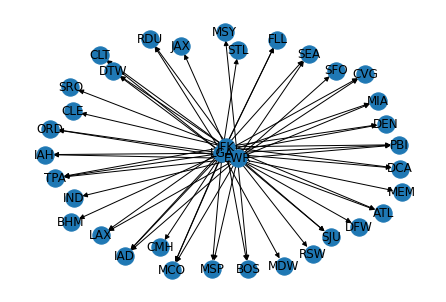

In [40]:
import matplotlib.pyplot as plt
plt.show()

nx.draw(graphD, with_labels=True)

{('EWR', 'BOS'): Text(-0.17387885374929046, 0.41392831982620326, '39.0'),
 ('EWR', 'CVG'): Text(0.4959083829929137, -0.04328978319593449, '110.5'),
 ('EWR', 'DFW'): Text(0.5002936640468629, -0.21754885977758348, '210.5'),
 ('EWR', 'IAD'): Text(0.4480037019578252, 0.18851718996864686, '41.0'),
 ('EWR', 'IAH'): Text(0.22572432751180554, -0.4880125164415123, '210.75'),
 ('EWR', 'IND'): Text(-0.30026884128311826, 0.3466805474987233, '104.0'),
 ('EWR', 'LAX'): Text(0.45669967991955357, -0.35811332945633084, '313.5'),
 ('EWR', 'MCO'): Text(-0.375522547410072, 0.1581249668043514, '136.0'),
 ('EWR', 'MEM'): Text(0.3042195961698558, 0.36894739799362763, '144.0'),
 ('EWR', 'MIA'): Text(-0.18973819607271294, 0.2446586247530848, '179.5'),
 ('EWR',
  'MSP'): Text(0.1346743894240878, -0.5203184849944686, '142.66666666666666'),
 ('EWR', 'MSY'): Text(0.44063979183865054, 0.013155732364414321, '161.0'),
 ('EWR', 'ORD'): Text(-0.39334079038162456, 0.060002103156625575, '113.0'),
 ('EWR', 'PBI'): Text(0.

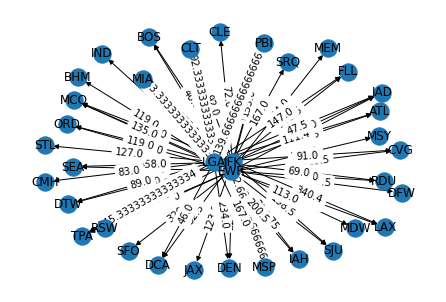

In [41]:
pos = nx.spring_layout(graphD)
edge_labels=dict([((u,v,),d['weight']) for u,v,d in graphD.edges(data=True)])

nx.draw(graphD, pos, with_labels=True)
nx.draw_networkx_edge_labels(graphD,pos,edge_labels=edge_labels)

In [42]:
weight = [graphD.edges[e]['weight'] for e in graphD.edges]

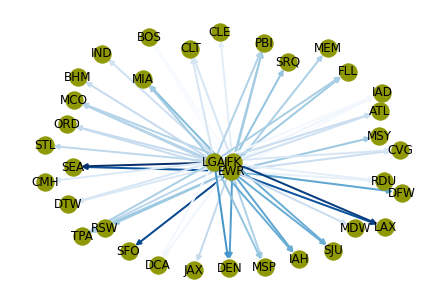

In [43]:
nx.draw(graphD, pos, node_color='#8f9805', edge_color=weight, width=2, edge_cmap=plt.cm.Blues, with_labels=True)